    0 epoch ==> cost : 10289.60636	 y=2.863x+0.570


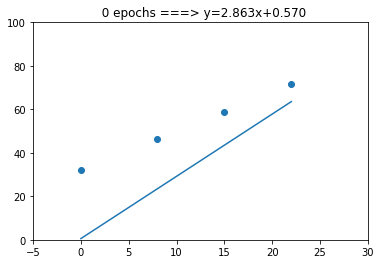

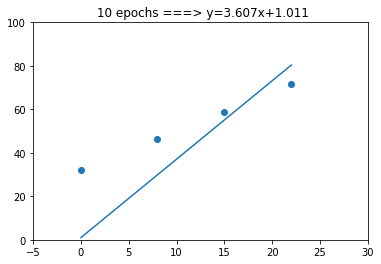

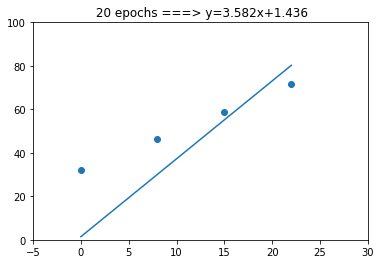

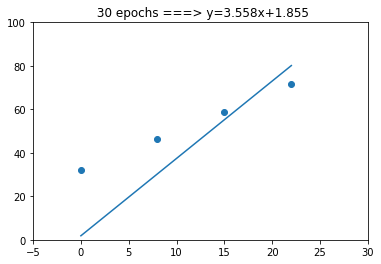

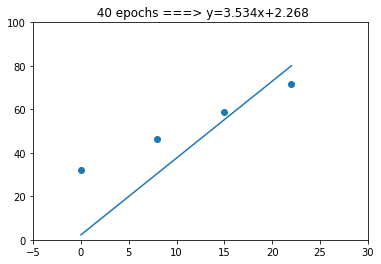

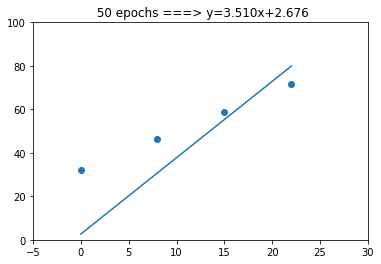

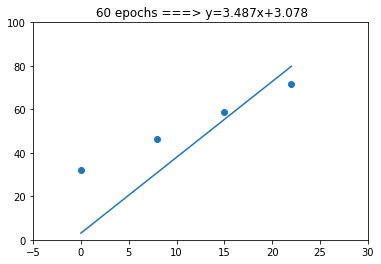

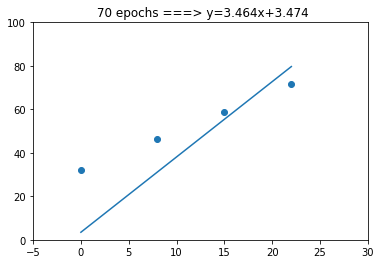

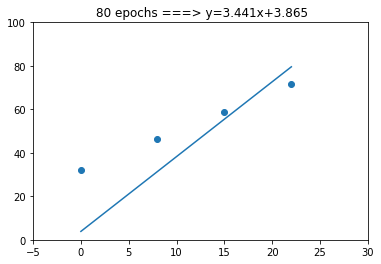

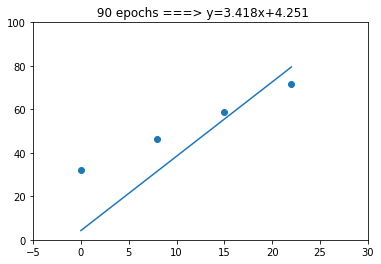

 1000 epoch ==> cost : 86.44354	 y=2.261x+24.097
 2000 epoch ==> cost : 5.46870	 y=1.916x+30.012
 3000 epoch ==> cost : 0.34597	 y=1.829x+31.500
 4000 epoch ==> cost : 0.02189	 y=1.807x+31.874
 5000 epoch ==> cost : 0.00138	 y=1.802x+31.968
 6000 epoch ==> cost : 0.00009	 y=1.800x+31.992
 6787 epoch ==> cost : 0.00001	 y=1.800x+31.997


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# random.seed(7777) # 테스트를 위한 seed 고정 # 주석처리하면 random함수 사용시 값이 변화함.

class linear_regression:
	def __init__(self, Xs=[0,8,15,22],Ys=[32,46.4,59,71.6], alpha = 0.001):
		
		self.alpha = alpha #학습률. learning rate 라고도 함.
		self.stop = 0.00001 #중단점

		self.X=np.array(Xs) #학습data X값
		self.Y=np.array(Ys) #학습data Y값

		self.W=random.random() # 랜덤값으로 초기지정
		self.b=random.random() # 랜덤값으로 초기지정

	#cost 함수 계산 ( (wx+b) -y)^2 )
	def cal_cost(self): 
		return sum((self.X * self.W + self.b - self.Y) **2)

	# W 편미분 계산
	def cal_dW(self):
		return sum((self.X * self.W +self.b - self.Y)* self.X)
	
	# b 편미분 계산
	def cal_db(self):
		return sum(self.X* self.W +self.b - self.Y)

	# train 과정
	def train(self,epoch=10000):
		for i in range(epoch):

			cost = abs(self.cal_cost()) # cost 계산
			
			if cost < self.stop: 
				print('{:5} epoch ==> cost : {:7.5f}\t y={:.3f}x+{:.3f}'.format(i,cost,self.W,self.b))
				break # 학습 많이 진행되면 중단.

			self.W -= self.alpha * self.cal_dW() # W값 업데이트
			self.b -= self.alpha * self.cal_db() # b값 업데이트

			if i%1000 ==0:
				print('{:5} epoch ==> cost : {:7.5f}\t y={:.3f}x+{:.3f}'.format(i,cost,self.W,self.b))
			
			## 시각화...?
			if i<100 and i%10==0:
				plt.figure()
				plt.scatter(self.X,self.Y)
				plt.axis([-5,30,0,100])
				plt.plot(self.X, self.predict(self.X))
				plt.title('{:3} epochs ===> y={:.3f}x+{:.3f}'.format(i,self.W, self.b))
				plt.show()
				
	def predict(self, x):
		return x*self.W + self.b

if __name__ == "__main__":
	LR = linear_regression()
	LR.train()
	# print(LR.predict(4))
	